In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('projectData.csv')
df.head()

,id,Department,work,cowarker,super,promo,pay,jobsat,intrinsic,instrum,chall,hind,acom,task,help,civic,safety
0,1,3,6.2,5.8,5.6,7.0,6.0,6.333333,5.6,3.75,3.0,2.2,3.666667,4.444444,5.285714,6.0,6.4
1,2,1,3.8,5.2,6.4,5.0,5.0,5.666667,5.4,3.50,2.8,1.6,4.000000,3.555556,6.285714,5.5,5.6
2,3,4,6.2,5.2,4.0,6.2,7.0,5.666667,6.4,4.50,3.2,1.6,2.333333,3.777778,4.714286,4.5,6.4
3,5,2,6.2,5.2,4.6,5.6,4.6,7.000000,5.6,4.50,3.8,4.0,4.666667,4.333333,5.285714,5.0,6.6
4,6,4,5.6,5.6,5.4,5.6,5.0,5.333333,5.6,3.00,3.0,2.4,4.000000,3.666667,6.285714,6.0,6.2


1. What employee factors should we be concerned about?
To answer this question, we'll scatter acom and task against other variables

In [26]:
dependents = ['acom', 'task']
independents = ['work',	'cowarker',	'super',	'promo',	'pay',	'jobsat',
    'intrinsic',	'instrum',	'chall',	'hind',	'help',	'civic',	'safety']
dfs = []
for d in dependents:
    for i in independents:
        dfs.append(pd.DataFrame({
            'dependent': [d]*56,
            'independent': [i]*56,
            'dependent_value': df[d],
            'independent_value': df[i],
            'Department': df['Department']
        }))

In [27]:
long_df = pd.concat(dfs, axis=0)
long_df.head()

,dependent,independent,dependent_value,independent_value,Department
0,acom,work,3.666667,6.2,3
1,acom,work,4.000000,3.8,1
2,acom,work,2.333333,6.2,4
3,acom,work,4.666667,6.2,2
4,acom,work,4.000000,5.6,4


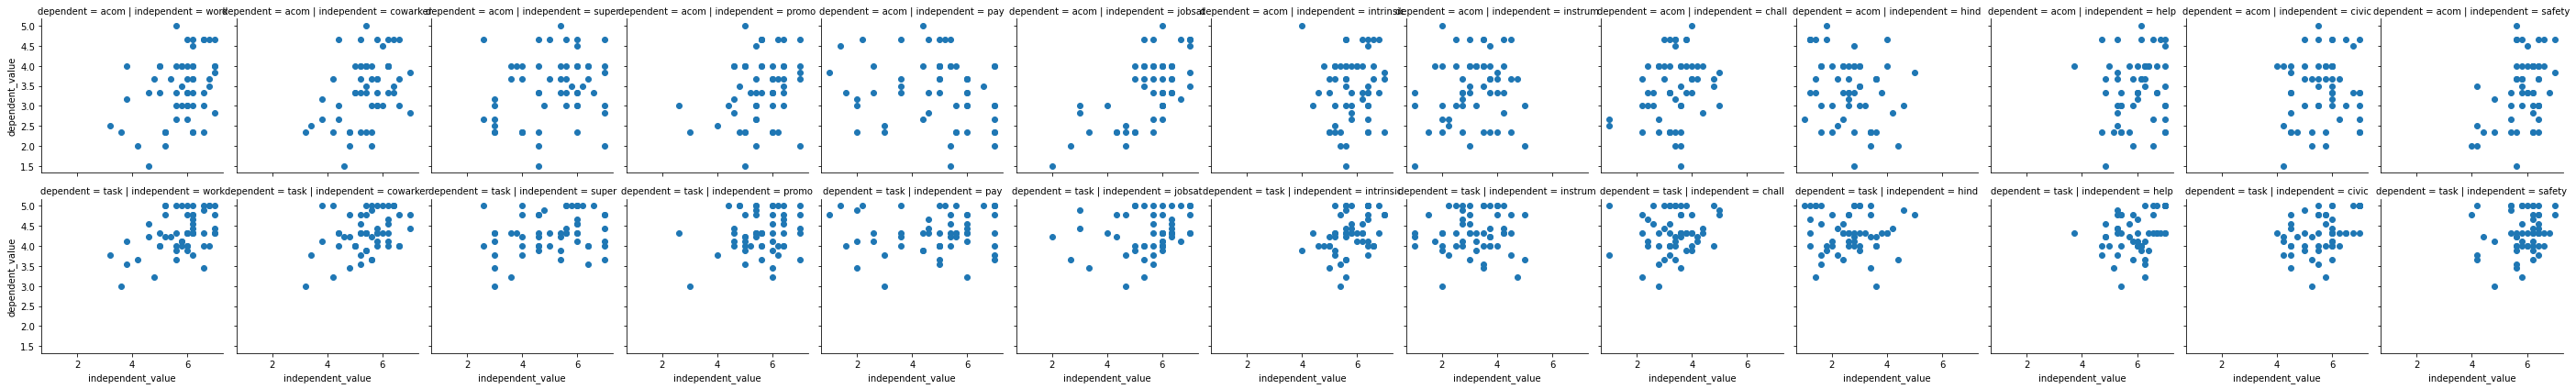

In [29]:
g = sns.FacetGrid(long_df, col='independent', row='dependent')
g.map(plt.scatter, 'independent_value','dependent_value')

Visually, Pay has little impact on both acom and task, although a significant number of employees are not happy with their pay. Some factors that have clear visual correlations include work, cowoker, job satisfaction and safety. This will be verified later by regression (Excel work)

3. Are there any meaningful differences between department?
To answer this question, we use histogram to visualize task performance and commitment of each department

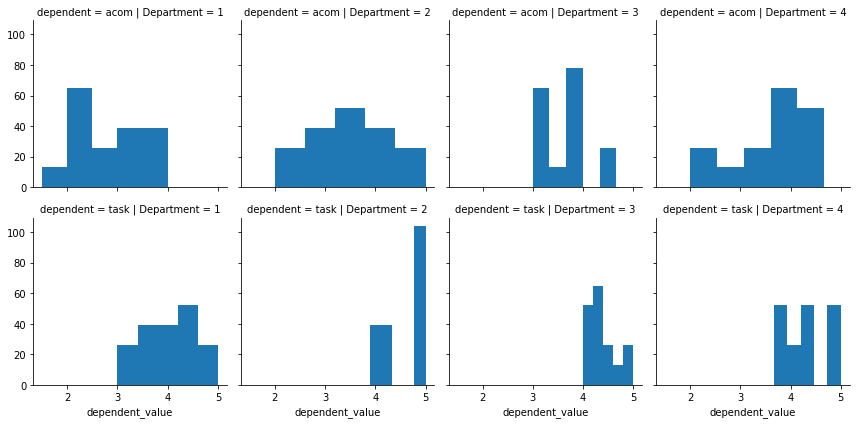

In [35]:
g = sns.FacetGrid(long_df, col = 'Department', row='dependent')
g.map(plt.hist,'dependent_value', bins = 5)

Apparently Department 1 has commitment issue. It also seems to have poorer performance compared to others. Department 2 has the best performance but average commitment, signaling management to pay attention to this group to retain best employees. We'll verify these hypotheses with Anova and t-test (Excel work)
